In [14]:
# !pip install tensorflow==2.16.2 
# !pip install matplotlib 

In [11]:
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D, Dropout
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
input_layer = Input(shape=(28, 28, 1))
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) 
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer) 

In [5]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
X_train = np.random.rand(1000, 28, 28, 1) 
y_train = X_train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) 

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0772 - val_loss: 0.0602
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0542 - val_loss: 0.0370
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0324 - val_loss: 0.0201
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0172 - val_loss: 0.0104
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0090 - val_loss: 0.0061
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - val_loss: 0.0042
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 0.0019


In [7]:
X_test = np.random.rand(200, 28, 28, 1)
y_test = X_test
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019
Test loss: 0.001880717114545405


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


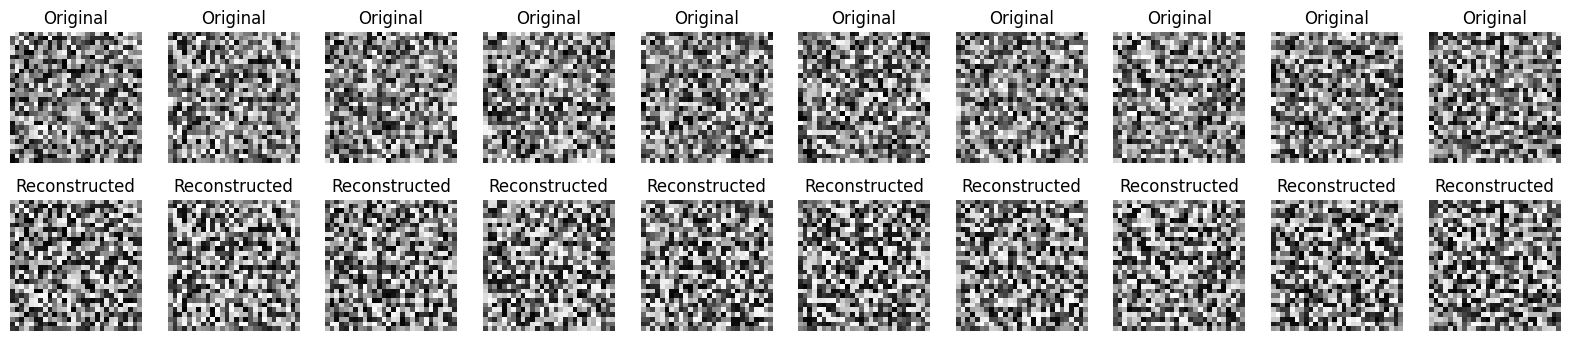

In [8]:
y_pred = model.predict(X_test) 
n = 10
plt.figure(figsize=(20, 4))
for i in range(n): 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original") 
    plt.axis('off') 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show() 

In [9]:
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0746 - val_loss: 0.0458
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0372 - val_loss: 0.0169
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0133 - val_loss: 0.0066
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024 - val_loss: 0.0023
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0023
Test loss: 0.0023044804111123085


In [12]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0759 - val_loss: 0.0574
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0532 - val_loss: 0.0344
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0338 - val_loss: 0.0189
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0218 - val_loss: 0.0111
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0158 - val_loss: 0.0075
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0128 - val_loss: 0.0056
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0111 - val_loss: 0.0045
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0098 - val_loss: 0.0038
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0091 - val_loss: 0.0034
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0085 - val_loss: 0.0030
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Test loss: 0.0030343146063387394


In [13]:
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2328 - val_loss: 0.0868
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0717 - val_loss: 0.0404
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0339 - val_loss: 0.0190
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0163 - val_loss: 0.0101
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0091 - val_loss: 0.0067
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0043 - val_loss: 0.0042
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0042
Test loss: 0.0042250435799360275
